In [67]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [68]:
data = pd.read_csv('restaurant.csv')


# Data Cleansing


(1230, 29)
Frequency Distributions:


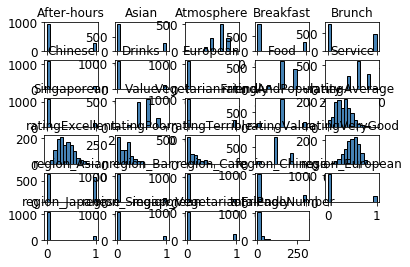

In [70]:
#drop below columns, as these info is free text type of data, which is unlikely to carry impactful info
new_data = data.drop(['_id', 'address', 'label', 'phone', 'restauranLink', 'restaurantName' ], axis = 1)

#convert ranking to numeric value for later PCA analysis
new_data['ranking'] = new_data['ranking'].str.split(' ', n=1, expand=True)[0].str.replace('#', '').str.replace(',' ,'')


#------------------------ Special Justification ---------------------------------------------------
#These 3 columns are a bit special, they are text based, but they seem contain categorical info. 
# I suspect that there could be cases that restaurants has more specific cuisine, e.g: American, or special service, 
# e.g: bar, could attract more good ratings, but specialized restaurant could be in dis-advantage as they have less
#services, due to this reason, I decided to convert the 3 columns into categorical columns, which will significantly 
#increase the total number of features.

new_data = new_data.join(new_data['cuisine'].str.replace(' ', '').str.get_dummies(sep=','))
new_data = new_data.join(new_data['openMeal'].str.replace(' ', '').str.get_dummies(sep=','))
new_data = new_data.join(new_data['region'].str.replace(' ', '').str.get_dummies(sep=',').add_prefix('region_'))

#drop text based data as it has been converted to numeric representation
new_data.drop(labels=['cuisine', 'openMeal', 'region'], axis=1,inplace = True)

#conver the $ to numeric value
def convert(col):
    col = str(col)
    if col == '$$$$':
        return  4
    elif col == '$$ - $$$':
        return 2.5
    elif col == '$$$':
        return 3
    elif col == '$$':
        return 2
    elif col == '$':
        return 1
    else:
        return 2.5

new_data['ratingAndPopularity'] = new_data['ratingAndPopularity'].apply(convert)

#------------------------ Special Justification ---------------------------------------------------
# Drop these columns: numbeOfReviews,numberAverage,numberExcellent,numberPoor,numberTerrible,numberVeryGood
# This is due to there are percentage based columns which deliver the same message:
# ratingAverage,ratingExcellent,ratingPoor,ratingTerrible,ratingVeryGood which is more meaningful than counts,
# As a new restaurant definitely has less number of counts than existing, but it could be a good restaurant

new_data.drop(labels=['numbeOfReviews', 'numberAverage', 'numberExcellent', 'numberPoor', 'numberTerrible', 'numberVeryGood'], axis=1,inplace = True)

#convert percentage string to float
new_data['ratingAverage'] = new_data['ratingAverage'].str.rstrip('%').astype('float') 
new_data['ratingExcellent'] = new_data['ratingExcellent'].str.rstrip('%').astype('float') 
new_data['ratingPoor'] = new_data['ratingPoor'].str.rstrip('%').astype('float') 
new_data['ratingTerrible'] = new_data['ratingTerrible'].str.rstrip('%').astype('float') 
new_data['ratingVeryGood'] = new_data['ratingVeryGood'].str.rstrip('%').astype('float') 

#Continue from previous assignment, 
# We used one-hot-encoding technique to transform those categorical type of data 
# columns into 1 or 0. But this will make number of columns into 158.

# But by looking into the data, there are many columns which had more than 90% of rows are either 1 or 0, which means 
#those columns' data do not have meaningful statistic feature, thus I decided to drop those columns 

drop_cols_0 = new_data.columns[(new_data == 0).sum() > 0.90*new_data.shape[0]]
# print(drop_cols_0)
new_data.drop(drop_cols_0, axis = 1, inplace = True) 

drop_cols_1 = new_data.columns[(new_data == 1).sum() > 0.90*new_data.shape[0]]
# print(drop_cols_1)
new_data.drop(drop_cols_1, axis = 1, inplace = True) 

#Drop Ranking columns as it is more like an sequence number instead of meaningful numeric data
new_data.drop(labels=['ranking'], axis = 1, inplace = True) 

print(new_data.shape)
# print(new_data.columns)
print("Frequency Distributions:")
# for column in new_data:
#     new_data[column].hist()
#  
#     plt.title(column)
#     plt.show()

new_data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=12, ylabelsize=12, grid=False)   
plt.show()

features = list(new_data)
colnames = np.transpose(features)


# Deal with missing Data and normalization

In [71]:

print(new_data.columns)
null_columns=new_data.columns[new_data.isnull().any()]
print(new_data[null_columns].isnull().sum())

from sklearn.preprocessing import Imputer
values = new_data.values

#------------------------ Justification --------------------------------------------
#Use median instead of mean, as mean may not represent most of the data and is greatly impacted by the outliners.

imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
new_value = imputer.fit_transform(values)
new_data = pd.DataFrame(new_value, columns=features)
sumry = new_data.describe().transpose()
print("Summary Statistics:\n",sumry,'\n')


Index(['Atmosphere', 'Food', 'Service', 'Value', 'ratingAndPopularity',
       'ratingAverage', 'ratingExcellent', 'ratingPoor', 'ratingTerrible',
       'ratingValue', 'ratingVeryGood', 'totalPageNumber', 'Asian', 'Chinese',
       'European', 'Singaporean', 'VegetarianFriendly', 'After-hours',
       'Breakfast', 'Brunch', 'Drinks', 'region_Asian', 'region_Bar',
       'region_Cafe', 'region_Chinese', 'region_European', 'region_Japanese',
       'region_Singaporean', 'region_VegetarianFriendly'],
      dtype='object')
Atmosphere         144
totalPageNumber     12
dtype: int64
Summary Statistics:
                             count       mean        std  min   25%   50%  \
Atmosphere                 1230.0   3.944715   0.429051  2.0   3.5   4.0   
Food                       1230.0   4.174797   0.329483  3.0   4.0   4.0   
Service                    1230.0   4.016667   0.397212  2.5   4.0   4.0   
Value                      1230.0   3.843496   0.389679  2.5   3.5   4.0   
ratingAndPopul

c:\users\guofe\workspace\nus_is_pr\venv\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Run Scaler


In [72]:
data_std = StandardScaler().fit_transform(new_data)


# Run KMeans


In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range(5, 40):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_std)

    # plt.scatter(data_std[:, 2], data_std[:, 3], c=preds, s=50, cmap='viridis')
    # plt.title(n_clusters)
    # plt.show()

    centers = clusterer.cluster_centers_

    score = silhouette_score (data_std, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


For n_clusters = 5, silhouette score is 0.1096123756512627)
For n_clusters = 6, silhouette score is 0.12393336999723631)
For n_clusters = 7, silhouette score is 0.12794487217351094)
For n_clusters = 8, silhouette score is 0.1303575506049219)
For n_clusters = 9, silhouette score is 0.12910850793778106)
For n_clusters = 10, silhouette score is 0.13328198331845412)
For n_clusters = 11, silhouette score is 0.13489390134316134)
For n_clusters = 12, silhouette score is 0.13476667881848972)
For n_clusters = 13, silhouette score is 0.12980959702609668)
For n_clusters = 14, silhouette score is 0.1273466027069585)
For n_clusters = 15, silhouette score is 0.12095108245504188)
For n_clusters = 16, silhouette score is 0.1326220949312681)
For n_clusters = 17, silhouette score is 0.11748570181368378)
For n_clusters = 18, silhouette score is 0.11610905578349079)
For n_clusters = 19, silhouette score is 0.11864629941485019)
For n_clusters = 20, silhouette score is 0.12049849321081818)
For n_clusters = 

# Analysis
This has shown that the performance is really bad, highest silhouette score is only 0.13


# Run PCA


In [74]:
n_components = len(features)
pca = PCA(n_components).fit(data_std)

# generate PC labels:
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))
    
# Get Eigenvectors & Eigenvalues
eigvec = pca.components_.transpose()
eigval = pca.explained_variance_

# Calculate Loadings = Eigenvector * SQRT(Eigenvalue)
# print('Loading Matrix:')
loadings= np.sqrt(eigval)*eigvec
# print(pd.DataFrame(loadings,columns=PCs,index=colnames),'\n')

print('\nEigenvectors (Linear Coefficients):')
print(pd.DataFrame(eigvec,columns=PCs,index=colnames),'\n')

var_expln= pca.explained_variance_ratio_ * 100
eigval = -np.sort(-eigval) #descending
npc = 60 # display-1
print("Eigenvalues   :",eigval[0:npc])
print("%Explained_Var:",var_expln[0:npc])
print("%Cumulative   :",np.cumsum(var_expln[0:npc]))
print('\n')



Eigenvectors (Linear Coefficients):
                                PC1       PC2       PC3       PC4       PC5  \
Atmosphere                 0.229793 -0.126938  0.069352  0.006888  0.124905   
Food                       0.310082  0.178984 -0.050994 -0.006915 -0.099344   
Service                    0.341691 -0.012520 -0.018005  0.006707  0.020876   
Value                      0.242754  0.217820 -0.081643  0.175192  0.033674   
ratingAndPopularity        0.140564 -0.154432  0.078039 -0.326202 -0.110712   
ratingAverage             -0.322121 -0.094954 -0.033404  0.010710 -0.025717   
ratingExcellent            0.394799  0.045604  0.060427 -0.014511  0.060043   
ratingPoor                -0.201434 -0.204253  0.106713 -0.175244 -0.028632   
ratingTerrible            -0.182578 -0.181550  0.149866 -0.180363 -0.025836   
ratingValue                0.365049  0.111191 -0.052805  0.085939  0.071956   
ratingVeryGood            -0.274836  0.081645 -0.123271  0.096263 -0.056312   
totalPageNumber

# Loading Plot


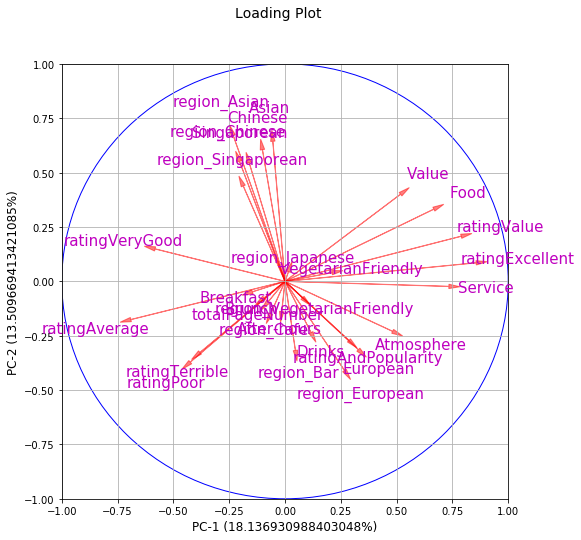

In [75]:
# (8) Loadings Plot
coeff = loadings[:,0:2]
fig = plt.figure(figsize=(8,8))
plt.xlim(-1,1)
plt.ylim(-1,1)
fig.suptitle('Loading Plot',fontsize=14)
plt.xlabel('PC-1 ('+str(var_expln[0])+'%)',fontsize=12)
plt.ylabel('PC-2 ('+str(var_expln[1])+'%)',fontsize=12)

for i in range(len(coeff[:,0])):
    plt.arrow(0,0,coeff[i,0],coeff[i,1],color='r',
              alpha=0.5,head_width=0.02, head_length=0.05,length_includes_head=True)
    plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,features[i],fontsize=15,
             color='m',ha='center',va='center')

circle = plt.Circle((0, 0), 0.9999999,  color='b', fill=False)
ax = fig.gca() 
ax.add_artist(circle)
plt.grid()
plt.show()


# Scree plot


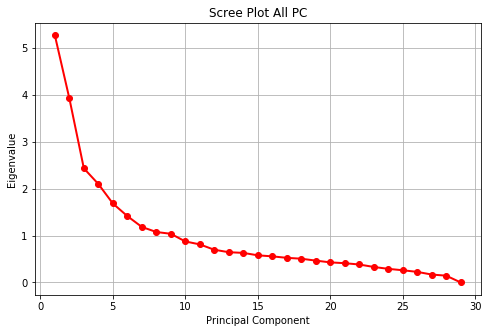

In [76]:
num_vars= len(features)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.plot(sing_vals, eigval, 'ro-', linewidth=2)
plt.title('Scree Plot All PC')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()



# Analysis
Compare with previous approach (without removing irrelevant or insignificant columns

I noticed the Eigenvalues dropped to below 1 at 10th PC, at 12 th PC, its cumulative value is 77%.
I choose the first 12 components in future analysis.


# Run k-means with Principle components


For n_clusters = 2, silhouette score is 0.16011159267491054)
For n_clusters = 3, silhouette score is 0.18416434625786482)
For n_clusters = 4, silhouette score is 0.17990840505437064)
For n_clusters = 5, silhouette score is 0.14931143537331232)
For n_clusters = 6, silhouette score is 0.16398185850550864)
For n_clusters = 7, silhouette score is 0.1761674719703171)
For n_clusters = 8, silhouette score is 0.17042630224967853)
For n_clusters = 9, silhouette score is 0.17212852122601746)
For n_clusters = 10, silhouette score is 0.17926993748929468)
For n_clusters = 11, silhouette score is 0.17782128771269037)
For n_clusters = 12, silhouette score is 0.1761508966220696)
For n_clusters = 13, silhouette score is 0.17866614254632265)
For n_clusters = 14, silhouette score is 0.17756134782242664)
For n_clusters = 15, silhouette score is 0.17390189968522804)
For n_clusters = 16, silhouette score is 0.16167159904569597)
For n_clusters = 17, silhouette score is 0.17063920989296352)
For n_clusters = 1

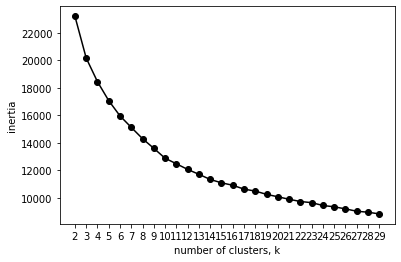

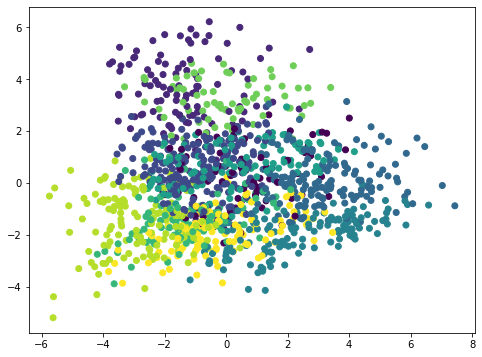

In [77]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(data_std)
PCA_components = pd.DataFrame(principalComponents)

inertias = []

iterations = range(2, 30)
for n_clusters in iterations:
    model = KMeans (n_clusters=n_clusters)
    preds = model.fit_predict(PCA_components)

    centers = model.cluster_centers_
    inertias.append(model.inertia_)

    score = silhouette_score (PCA_components, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
plt.plot(iterations, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(iterations)
plt.show()

#Here we will choose number of cluster as 10
model = KMeans(n_clusters=10)
preds = model.fit_predict(PCA_components)


plt.figure(figsize=(8, 6))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=model.labels_)
plt.show()


# Analysis
The result is still not satisfactory, and will run k-means on un-scaled data


For n_clusters = 2, silhouette score is 0.35734181406023263)
For n_clusters = 3, silhouette score is 0.4003987419616869)
For n_clusters = 4, silhouette score is 0.4062539677269643)
For n_clusters = 5, silhouette score is 0.32270354156562814)
For n_clusters = 6, silhouette score is 0.3251262350901483)
For n_clusters = 7, silhouette score is 0.2683094695546693)
For n_clusters = 8, silhouette score is 0.280870000318036)
For n_clusters = 9, silhouette score is 0.2543055261990588)
For n_clusters = 10, silhouette score is 0.24894920212875613)
For n_clusters = 11, silhouette score is 0.25220106563025113)
For n_clusters = 12, silhouette score is 0.2513362484301639)
For n_clusters = 13, silhouette score is 0.2449238064038204)
For n_clusters = 14, silhouette score is 0.2453661206459363)
For n_clusters = 15, silhouette score is 0.23075853907985913)
For n_clusters = 16, silhouette score is 0.24546491085901617)
For n_clusters = 17, silhouette score is 0.23878973223674096)
For n_clusters = 18, silho

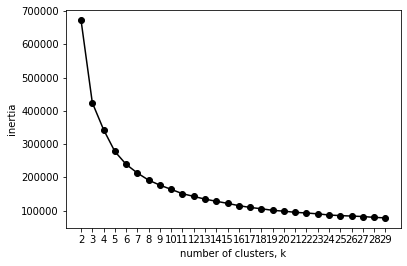

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []

iterations = range(2, 30)
for n_clusters in iterations:
    model = KMeans (n_clusters=n_clusters)
    preds = model.fit_predict(new_data)

    centers = model.cluster_centers_
    inertias.append(model.inertia_)

    score = silhouette_score (new_data, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
plt.plot(iterations, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(iterations)
plt.show()


# Analysis
Here we will choose number of cluster as 4, as it score more than 0.4


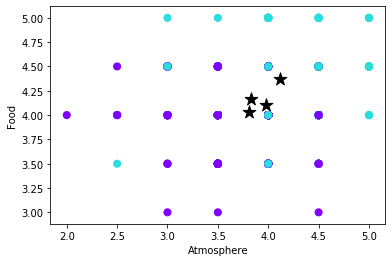

In [80]:
model = KMeans(n_clusters=4)
# preds = model.fit_predict(new_data)
model.fit(new_data)
label_pred= model.labels_
centers = model.cluster_centers_

plt.scatter(x = new_data.iloc[:,0], y = new_data.iloc[:,1], c = label_pred, s=50, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], c='k', marker = '*', s = 180)
plt.xlabel(new_data.columns[0])
plt.ylabel(new_data.columns[1])
plt.show()